$$\textbf{Reconocimiento estadístico de Patrones. Tarea 3}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler




$\color{lightblue}{Ejericicio \space 3}$ <br>

In [350]:
#Funcion stripe
def stripe_plot(X, labels,centroids,title="Stripe plot"):
    #obtenemos las etiqutas
    unique_labels = np.unique(labels)
    #iteramos sobre cada una
    for label in unique_labels:
        #obtenemos los puntos de X que pertecen al cluster cuya etiquta es label
        cluster_points = X[labels == label]

        #lista de distancias de cada punto en el cluster a su centroide
        distances = np.linalg.norm(cluster_points - centroids[label], axis=1)

        #generamos un vector que contenga tantos puntos como el cluster actual
        #y lo llenamos con el valor de la etiqueta 
        x = np.full(len(cluster_points), label) 
        #graficamos la distancia de cada punto de ese cluster a su centroide
        plt.plot(x,distances, '_', color='b')
        
    plt.xlabel('Cluster')
    #ponemos los lim del eje y de 0 a la mayor etiqueta más uno
    #esto para poder apreciar la dispersion de distancias mejor
    #plt.ylim( 0,max(unique_labels)+1)
    plt.ylabel('Distancia al centroide')
    plt.title(title)
    plt.show()

1. Generamos los datos

In [351]:
# Generamos datos de prueba a partir de gaussianas
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.6, random_state=0)

2. Visualizamos

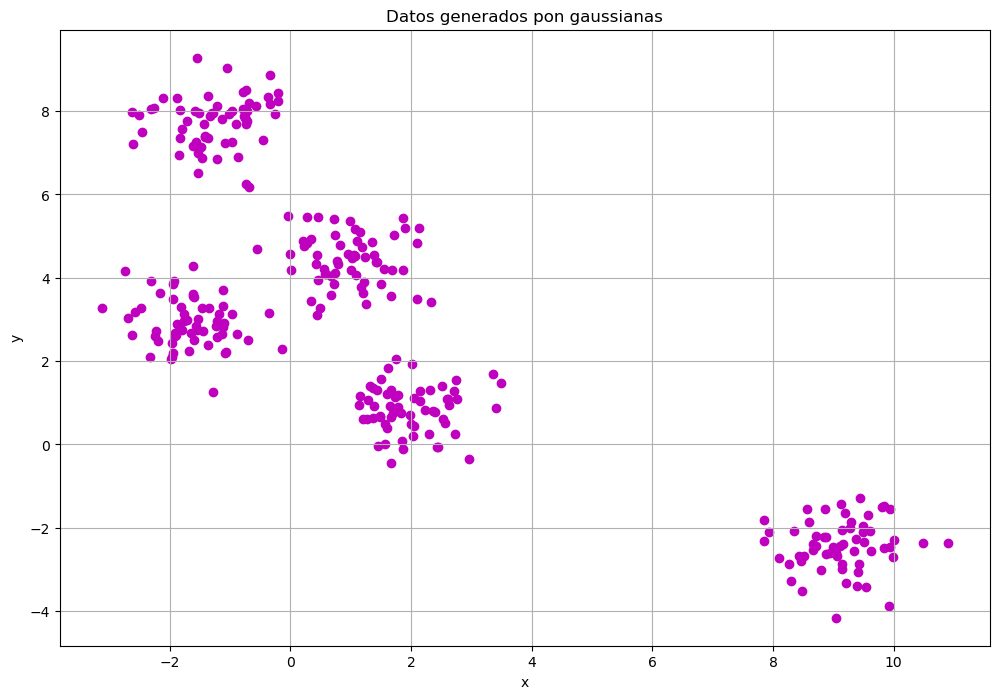

In [352]:
#visuaizamos los datos generados (claramente hay 5 grupos)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1],color='m')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos generados pon gaussianas')
plt.grid()

3. Aplicamos K-means

In [353]:
#APlicamos K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans_clusters = kmeans.labels_

In [354]:
#otenemos los entroides
centroides = kmeans.cluster_centers_
print("Centroides de los clusters:")
print(centroides)

Centroides de los clusters:
[[ 2.00401597  0.84371973]
 [-1.66877007  2.91652498]
 [ 9.12239104 -2.42822185]
 [-1.24268927  7.75317247]
 [ 0.96475862  4.4261437 ]]


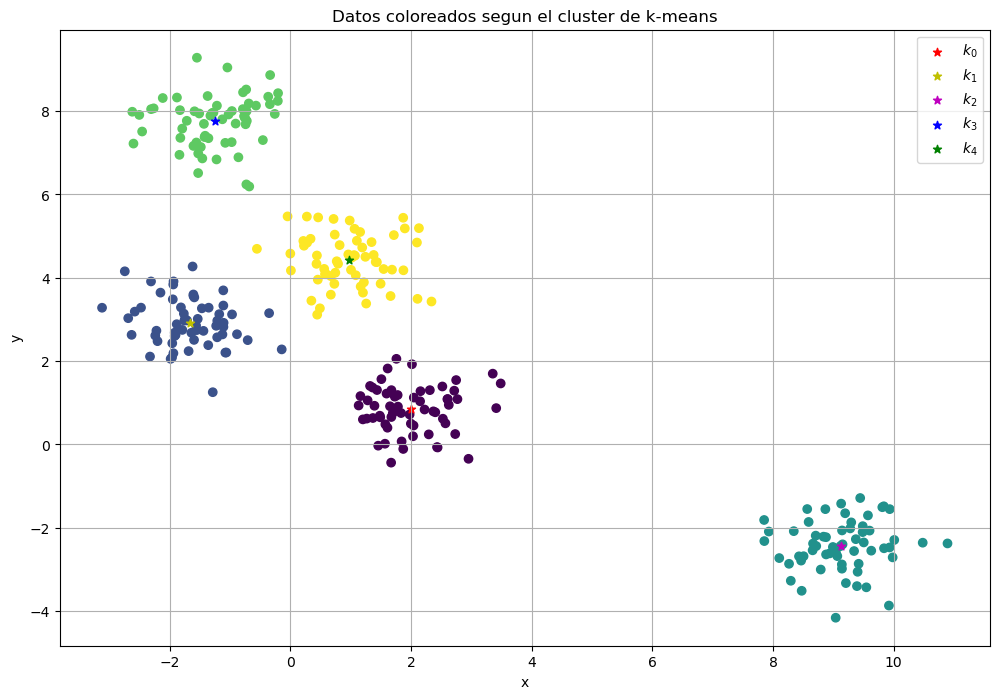

In [355]:
#visuaizamos los datos generados coloreados por cluster de kmeans y sus centroides
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1],c=kmeans_clusters)
plt.scatter(centroides[0][0],centroides[0][1],marker='*',color="r",label="$k_0$")
plt.scatter(centroides[1][0],centroides[1][1],marker='*',color="y",label="$k_1$")
plt.scatter(centroides[2][0],centroides[2][1],marker='*',color="m",label="$k_2$")
plt.scatter(centroides[3][0],centroides[3][1],marker='*',color="b",label="$k_3$")
plt.scatter(centroides[4][0],centroides[4][1],marker='*',color="g",label="$k_4$")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos coloreados segun el cluster de k-means')
plt.grid()

Como se esperaba, se generan 5 clusters muy bien definidos (pues así se generaron los datos) y el centroide se ve adecuado en cada uno de ellos.

$$\textit{Ejemplo 2}$$

1. Generamos los datos

In [356]:
#en este ejemplo aumentamos la desviación estandar al doble
X1, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=0)

2. Visualizamos

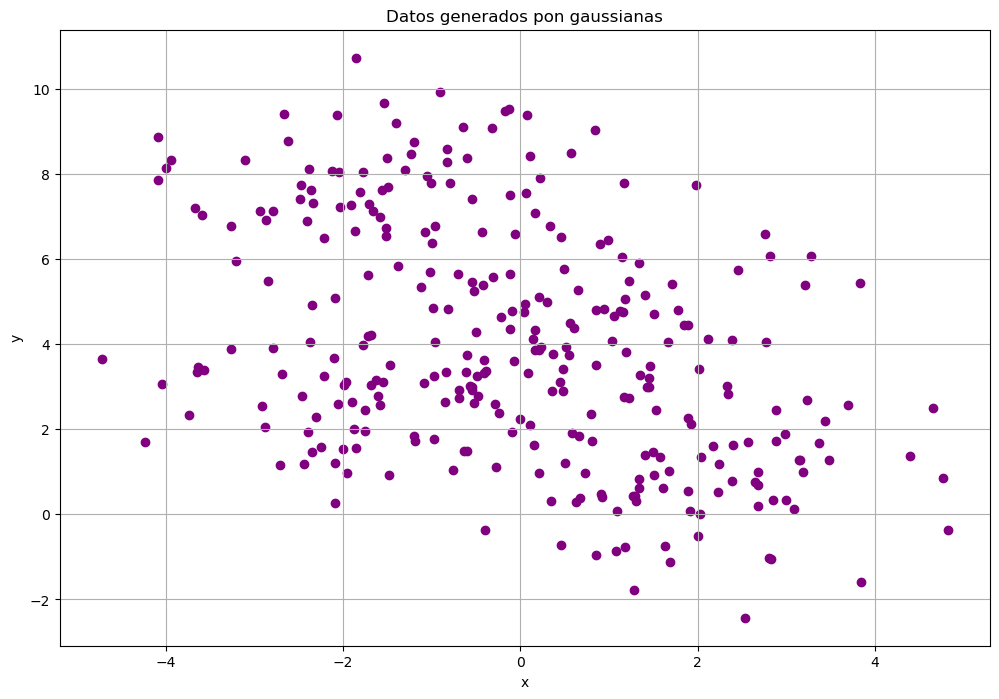

In [357]:
#visuaizamos los datos generados (claramente hay 5 grupos)
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1],color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos generados pon gaussianas')
plt.grid()

A diferencia de la gráfica de los dato generados del ejemplo 1, en esta ocasión no se notan tan claramente los clusters.

3. Aplicamos K-means

In [358]:
#APlicamos K-means
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(X1)
kmeans_clusters1 = kmeans1.labels_

In [359]:
#otenemos los entroides
centroides1 = kmeans1.cluster_centers_
print("Centroides de los clusters:")
print(centroides1)

Centroides de los clusters:
[[-1.55459817  7.75563116]
 [ 2.02667446  0.76891095]
 [-1.67545121  2.67687229]
 [ 0.9128386   4.60295563]]


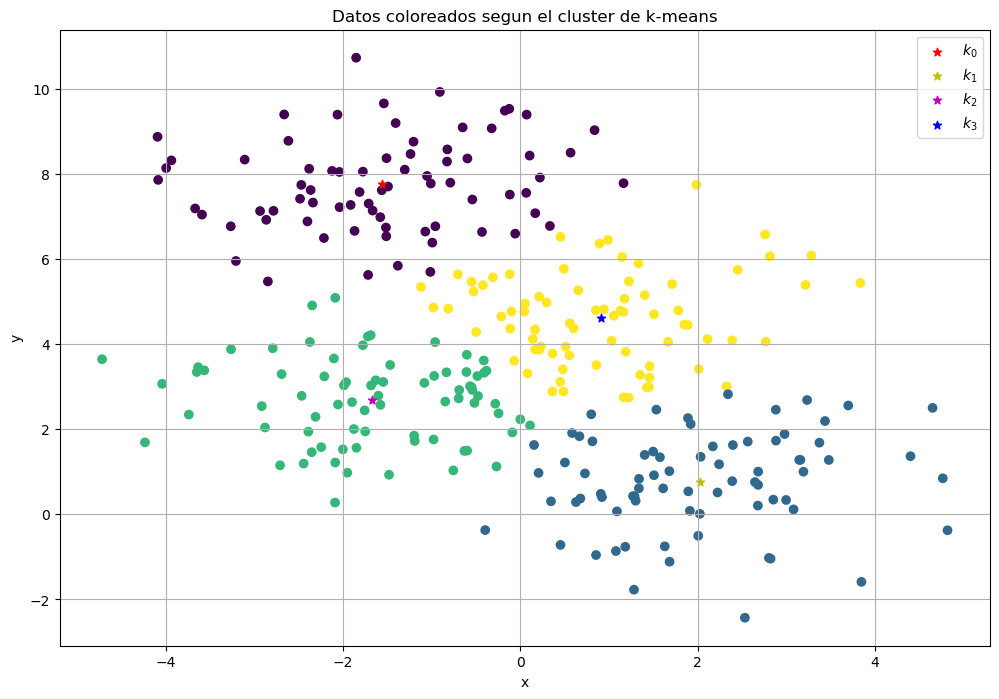

In [360]:
#visuaizamos los datos generados coloreados por cluster de kmeans y sus centroides
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1],c=kmeans_clusters1)
plt.scatter(centroides1[0][0],centroides1[0][1],marker='*',color="r",label="$k_0$")
plt.scatter(centroides1[1][0],centroides1[1][1],marker='*',color="y",label="$k_1$")
plt.scatter(centroides1[2][0],centroides1[2][1],marker='*',color="m",label="$k_2$")
plt.scatter(centroides1[3][0],centroides1[3][1],marker='*',color="b",label="$k_3$")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos coloreados segun el cluster de k-means')
plt.grid()

En este ejemplo, ya no es muy claro que los centroides (y por lo tanto) los clusters sean adecuados pues hay mucha dispersión el los datos.

$$\textit{Comparación de stripe-plots de ambos conjuntos}$$

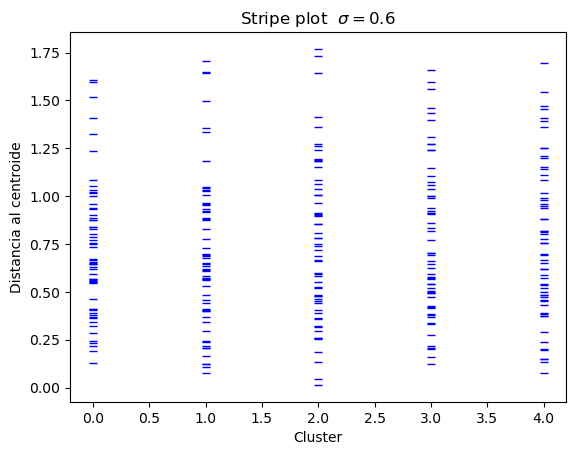

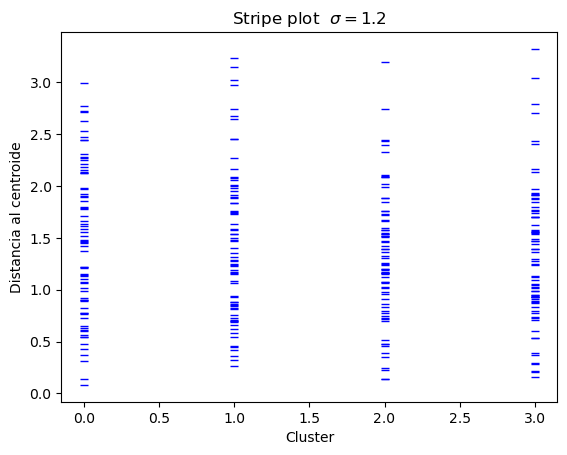

In [361]:
title1="Stripe plot  $\sigma=0.6$"
stripe_plot(X, kmeans_clusters,centroides,title1)
title2="Stripe plot  $\sigma=1.2$"
stripe_plot(X1, kmeans_clusters1,centroides1,title2)

Observamos que cuando los datos se generaron con una mayor desviación estandar la distribución de distancias de los puntos a su centroide es más dispersa y las distancias son, en general, más grandes que en el primer ejemplo. 

Esto es congruente con lo que observamos en las gráficas coloreadas según el cluster de k-means.

$\color{lightblue}{Ejericicio \space 4}$ <br>

1.Cargamos los datos en un Data Frame

In [362]:
# Leemos los datos
heptatlon_data = pd.read_csv("heptatlon(1).txt", sep=" ",index_col=0)
heptatlon_data.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [363]:
# Normalizamos
scaler = MinMaxScaler()
heptatlon_data= pd.DataFrame(scaler.fit_transform(heptatlon_data), columns=heptatlon_data.columns, index=heptatlon_data.index)
heptatlon_data.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),0.000000,1.000000,0.930979,0.000000,1.000000,0.844332,0.109865,1.000000
John (GDR),0.042895,0.833333,1.000000,0.269136,0.765690,0.582064,0.048942,0.855413
Behmer (GDR),0.136729,0.916667,0.674157,0.133333,0.753138,0.749577,0.000000,0.841101
Sablovskaite (URS),0.246649,0.833333,0.839486,0.335802,0.573222,0.600677,0.204945,0.724404
Choubenkova (URS),0.219839,0.666667,0.764045,0.338272,0.602510,0.996616,0.094316,0.724404


2. Método del codo

Usaremos el métdoo del codo para darnos una idea de cuántos cluster utilizar para k-means

In [364]:
#método del codo para determinar el numero de codos adecuado
def elbow(datos,N):
    suma_quad = [] #lista vacia para almacenar la suma de las dist cuadradas
    for k in range(1,N):
        kmeans = KMeans(n_clusters=k) #aplicamos kmeans
        kmeans.fit(datos) 
        suma_quad.append(kmeans.inertia_) #agregamos a la lista la suma correspondiente
    #graficamos
    plt.figure(figsize=(8, 6))
    plt.plot(range(1,N), suma_quad, 'bx-')
    plt.xlabel('Clusters')
    plt.ylabel('Distancia')
    plt.title('Elbow Method')
    plt.xticks(np.arange(1, N, 1))
    plt.show()

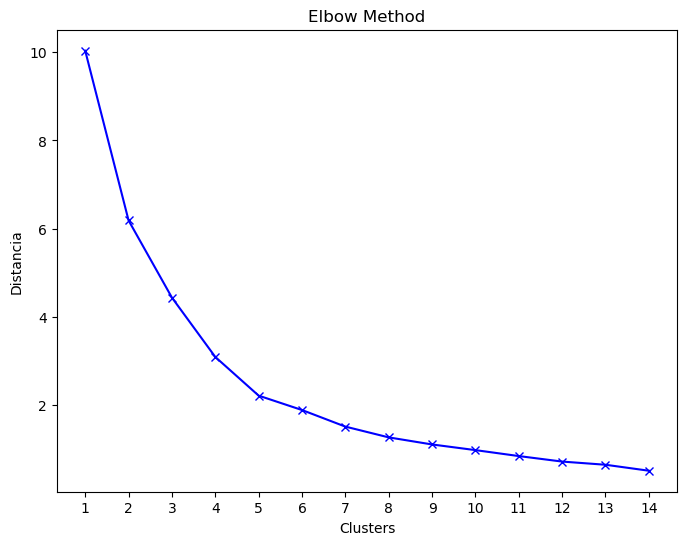

In [365]:
import warnings 
warnings.filterwarnings("ignore") #aqui aparecian muchos warnings por lo que importe warnings  para no imprimirlos
elbow(heptatlon_data,15)

De la gráfica podemos observar que en 4-5 la gráfica comienza a aplanarse por lo que probaremos con estos dos números.

3. K-means

In [366]:
#APlicamos K-means con 4 clusters
kmeans_h1 = KMeans(n_clusters=4)
kmeans_h1.fit(heptatlon_data)
heptatlon_kmeans1 = kmeans_h1.labels_

#otenemos los entroides
centroides_h1 = kmeans_h1.cluster_centers_
print("Centroides de los clusters:")
print(centroides_h1)

Centroides de los clusters:
[[0.12922252 0.85       0.84173355 0.21530864 0.73891213 0.75465313
  0.09161356 0.82906422]
 [0.42091153 0.6547619  0.290759   0.74462081 0.38792588 0.20497945
  0.34536251 0.38091743]
 [0.25960679 0.89583333 0.49839486 0.47654321 0.57496513 0.51325437
  0.30654686 0.59795107]
 [1.         0.         0.28571429 0.88888889 0.         0.90524535
  1.         0.        ]]


In [367]:
#APlicamos K-means con 5 clusters
kmeans_h = KMeans(n_clusters=5)
kmeans_h.fit(heptatlon_data)
heptatlon_kmeans = kmeans_h.labels_

#otenemos los entroides
centroides_h = kmeans_h.cluster_centers_
print("Centroides de los clusters:")
print(centroides_h)

Centroides de los clusters:
[[0.31233244 0.91666667 0.39125201 0.5462963  0.5083682  0.82783418
  0.41065511 0.55550459]
 [0.4562109  0.625      0.26565008 0.74897119 0.35076709 0.23801466
  0.34225508 0.3582263 ]
 [0.230563   0.87962963 0.53968254 0.47242798 0.60855416 0.31716488
  0.266661   0.60782875]
 [1.         0.         0.28571429 0.88888889 0.         0.90524535
  1.         0.        ]
 [0.12922252 0.85       0.84173355 0.21530864 0.73891213 0.75465313
  0.09161356 0.82906422]]


4. PCA

In [368]:
#Para los datos
pca = PCA(n_components=2)
pca.fit(heptatlon_data)
data_2D = pca.transform(heptatlon_data)

In [369]:
#obtenemos las componentes principales sobre las que proyetamos
vectores_de_proyeccion = pca.components_
vectores_de_proyeccion

array([[ 0.36431949, -0.32733076, -0.38114606,  0.42129802, -0.37433749,
        -0.15479568,  0.32015062, -0.41324916],
       [ 0.16922449, -0.19965882,  0.11183759, -0.11740114, -0.11669301,
         0.92430476,  0.19289596, -0.00658471]])

In [370]:
#proyectamos los centroides obtenidos 4 clusters
centroides_proyectados1 = np.dot(centroides_h1, vectores_de_proyeccion.T)
centroides_proyectados1

array([[-1.1679667 ,  0.54453392],
       [-0.08188273,  0.09390405],
       [-0.63149069,  0.32736672],
       [ 0.80993029,  1.12644006]])

In [371]:
#proyectamos los centroides obtenidos con 5 clusters
centroides_proyectados = np.dot(centroides_h, vectores_de_proyeccion.T)
centroides_proyectados

array([[-0.52177176,  0.63085852],
       [-0.03069906,  0.13692171],
       [-0.65330956,  0.13786275],
       [ 0.80993029,  1.12644006],
       [-1.1679667 ,  0.54453392]])

$$\textit{Comparación de scatter (2D) y stripe-plots}$$

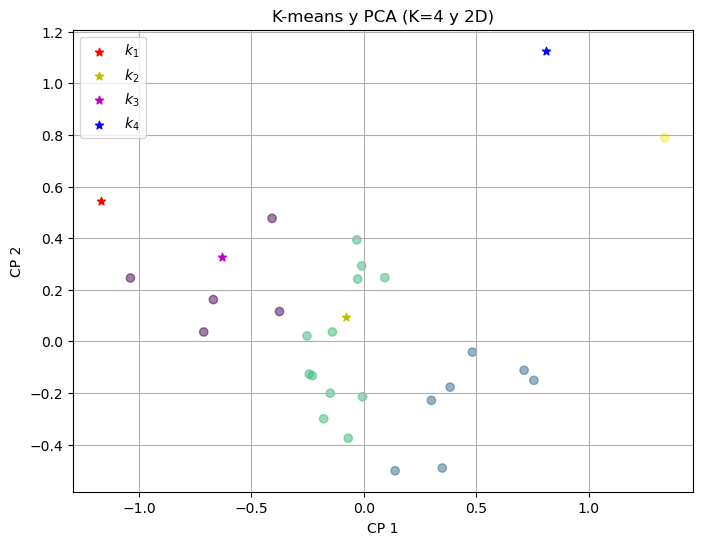

In [372]:

plt.figure(figsize=(8, 6))
plt.scatter(data_2D[:, 0], data_2D[:, 1],c=heptatlon_kmeans1,  alpha=0.5)
plt.scatter(centroides_proyectados1[0][0],centroides_proyectados1[0][1],marker='*',color="r",label="$k_1$")
plt.scatter(centroides_proyectados1[1][0],centroides_proyectados1[1][1],marker='*',color="y",label="$k_2$")
plt.scatter(centroides_proyectados1[2][0],centroides_proyectados1[2][1],marker='*',color="m",label="$k_3$")
plt.scatter(centroides_proyectados1[3][0],centroides_proyectados1[3][1],marker='*',color="b",label="$k_4$")
plt.legend()
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('K-means y PCA (K=4 y 2D)')
plt.grid(True)
plt.show()


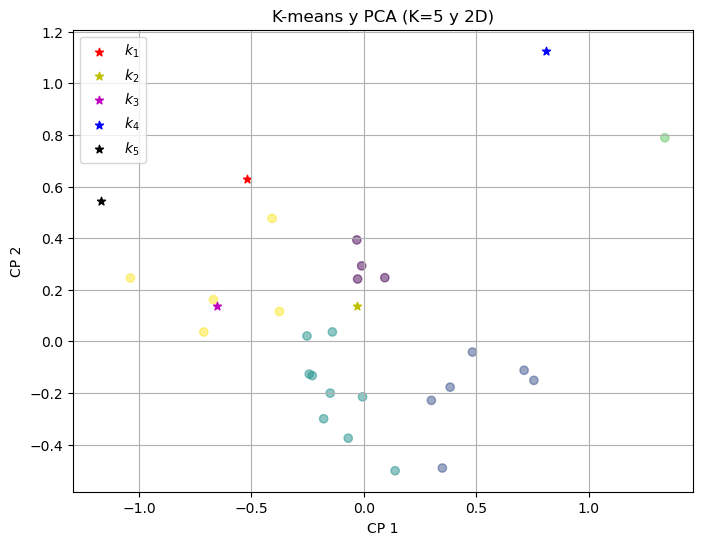

In [373]:

plt.figure(figsize=(8, 6))
plt.scatter(data_2D[:, 0], data_2D[:, 1],c=heptatlon_kmeans,  alpha=0.5)
plt.scatter(centroides_proyectados[0][0],centroides_proyectados[0][1],marker='*',color="r",label="$k_1$")
plt.scatter(centroides_proyectados[1][0],centroides_proyectados[1][1],marker='*',color="y",label="$k_2$")
plt.scatter(centroides_proyectados[2][0],centroides_proyectados[2][1],marker='*',color="m",label="$k_3$")
plt.scatter(centroides_proyectados[3][0],centroides_proyectados[3][1],marker='*',color="b",label="$k_4$")
plt.scatter(centroides_proyectados[4][0],centroides_proyectados[4][1],marker='*',color="black",label="$k_5$")
plt.legend()
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('K-means y PCA (K=5 y 2D)')
plt.grid(True)
plt.show()


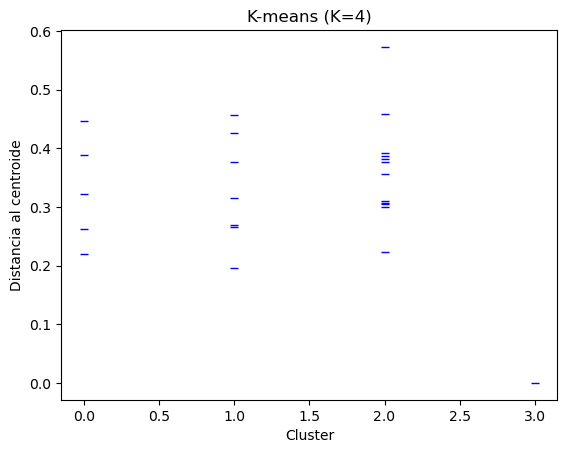

In [374]:
stripe_plot(heptatlon_data,  heptatlon_kmeans1,centroides_h1,"K-means (K=4)")

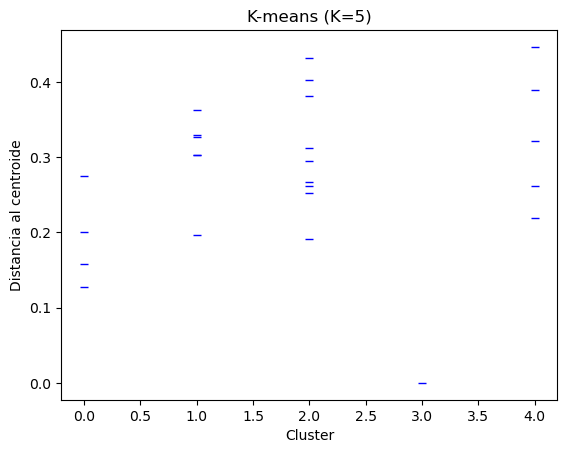

In [375]:
stripe_plot(heptatlon_data,  heptatlon_kmeans,centroides_h,"K-means (K=5)")

En las graficas de scatter no se visualiza si los centroides son adecuados o no, sin embargo al hacer el scatterplot, podemos observar la distribución de distancias está en un rango un poco menor para K=5.
Aún así no podemos decir que sea un buen agrupamiento, como se puede observar en el scatter hay un outlayer extraño que forma un único cluster y en en general en la grafica 2D no se observa claramente un matrón de grupos.